**Import Libaries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

**Data Preprocessing**

In [2]:
Housing=pd.read_csv('california_housing.csv')

In [3]:
Housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


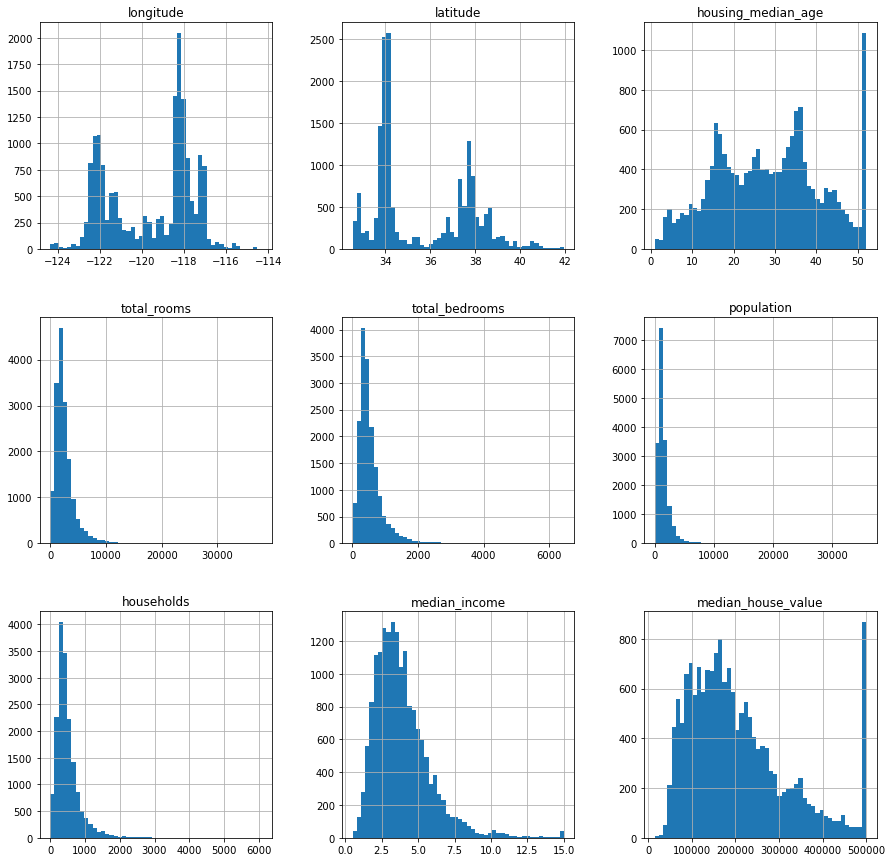

In [4]:
Housing.hist(bins=50,figsize=(15,15))
plt.show()

In [5]:
Housing.shape

(17000, 9)

No handles with labels found to put in legend.


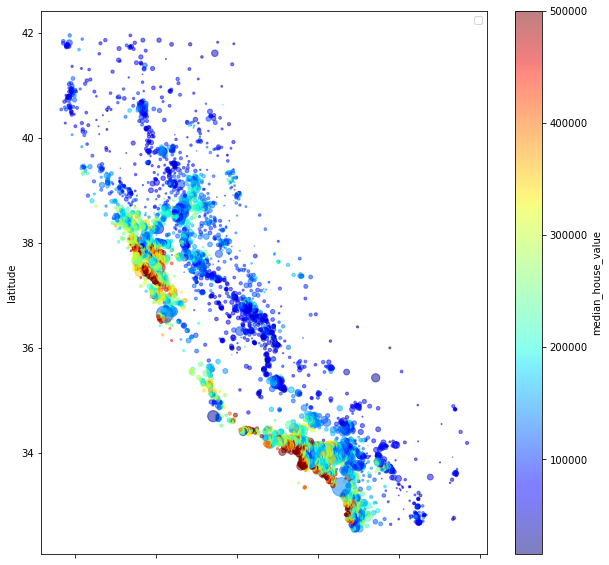

In [6]:
Housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,figsize=(10,10),s=Housing['population']/100,c="median_house_value",cmap="jet")
plt.legend()

This shows us that housing is dependent on the location (prices increase as the location moves towards the bay)

**Correlation Matrix**

In [7]:
corr_matrix=Housing.corr()

In [8]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.144917
longitude            -0.044982
population           -0.027850
total_bedrooms        0.045783
households            0.061031
housing_median_age    0.106758
total_rooms           0.130991
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

**Seaborn plots**

In [9]:
from pandas.plotting import scatter_matrix

<Figure size 1440x1440 with 0 Axes>

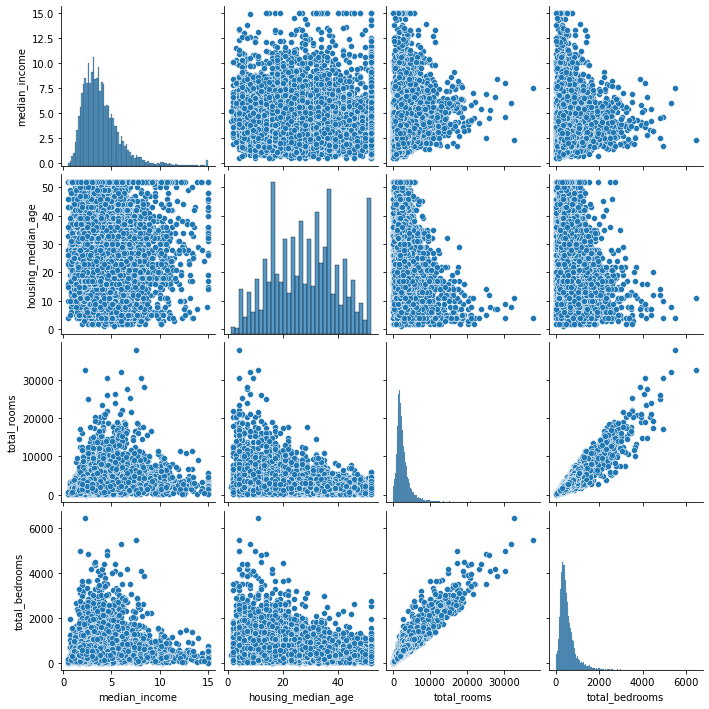

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(Housing[['median_income','housing_median_age','total_rooms','total_bedrooms']])

<AxesSubplot:>

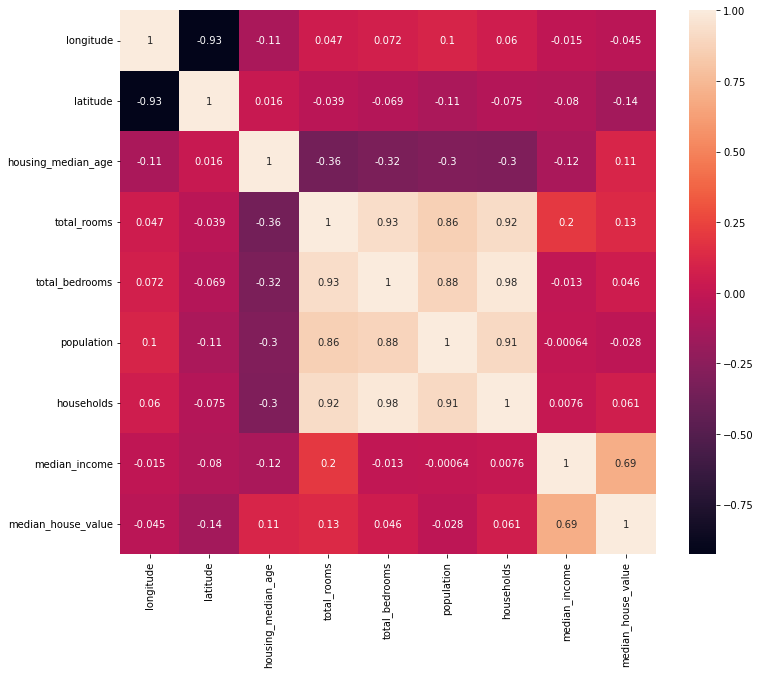

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(Housing.corr(),annot=True)

In [13]:
Housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [14]:
Housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

**Statistics of Columns**

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer=SimpleImputer(strategy="median")

In [17]:
df_num=Housing.drop(columns=["total_bedrooms"])
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [18]:
imputer.statistics_

array([-1.1849e+02,  3.4250e+01,  2.9000e+01,  2.1270e+03,  1.1670e+03,
        4.0900e+02,  3.5446e+00,  1.8040e+05])

In [19]:
df_num.median().values

array([-1.1849e+02,  3.4250e+01,  2.9000e+01,  2.1270e+03,  1.1670e+03,
        4.0900e+02,  3.5446e+00,  1.8040e+05])

In [20]:
X=imputer.transform(df_num)

In [21]:
df=pd.DataFrame(X,columns=df_num.columns)

In [22]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [23]:
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,1298.0,478.0,1.9797,85800.0


**Min-Max Scaling**

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()
trans=scaler.fit_transform(df.drop(columns=['median_house_value']))

In [26]:
trans=pd.DataFrame(trans,columns=df.columns[:-1])
trans

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.017405,0.042921,0.098281
...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.025337,0.060516,0.128081
16996,0.007968,0.866100,0.686275,0.061869,0.033381,0.076303,0.139170
16997,0.004980,0.988310,0.313725,0.070515,0.034782,0.074823,0.174577
16998,0.004980,0.984060,0.352941,0.070384,0.036296,0.078441,0.102054


**Performing Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
lr=LinearRegression()
X=trans[['median_income','households','total_rooms']]
y=df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
predictions=lr.predict(x_train)

**Calculating Metrics**

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print("R2:",metrics.r2_score(y_train,predictions))

MAE: 60164.21574618132
MSE: 6576565444.1793995
RMSE: 81096.02606897209
R2: 0.5056841538504341


In [33]:
residuals=predictions-y_train

C:\Users\Jothisoft\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

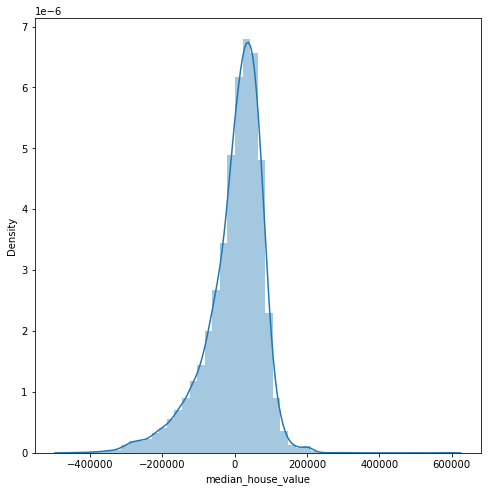

In [34]:
plt.figure(figsize=(8,8))
sns.distplot(residuals)

In [35]:
from sklearn.svm import SVR

In [36]:
svr=SVR()

In [37]:
svr.fit(x_train,y_train)

SVR()

In [38]:
predictions=svr.predict(x_test)

In [39]:
predictions
y_test

10941    142700.0
5250     500001.0
10292     61800.0
2266     162800.0
6398      90600.0
           ...   
7026     308900.0
2018     106500.0
10038     93000.0
16467    289600.0
7245     231200.0
Name: median_house_value, Length: 5610, dtype: float64

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2:",metrics.r2_score(y_test,predictions))

MAE: 89761.54488658241
MSE: 14578619968.138838
RMSE: 120741.95612188349
R2: -0.06148943910465676


In [41]:
param_grid={"C":[0.01,0.1,10,100,1000],"gamma":[1,0.1,0.01,0.001],"kernel":["linear"]}

**Grid Search**

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [45]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...C=0.01, gamma=1, kernel=linear;, score=-0.056 total time=   3.4s
[CV 2/5] END ...C=0.01, gamma=1, kernel=linear;, score=-0.059 total time=   3.4s
[CV 3/5] END ...C=0.01, gamma=1, kernel=linear;, score=-0.050 total time=   3.3s
[CV 4/5] END ...C=0.01, gamma=1, kernel=linear;, score=-0.053 total time=   3.4s
[CV 5/5] END ...C=0.01, gamma=1, kernel=linear;, score=-0.058 total time=   3.4s
[CV 1/5] END .C=0.01, gamma=0.1, kernel=linear;, score=-0.056 total time=   3.7s
[CV 2/5] END .C=0.01, gamma=0.1, kernel=linear;, score=-0.059 total time=   3.5s
[CV 3/5] END .C=0.01, gamma=0.1, kernel=linear;, score=-0.050 total time=   3.6s
[CV 4/5] END .C=0.01, gamma=0.1, kernel=linear;, score=-0.053 total time=   3.6s
[CV 5/5] END .C=0.01, gamma=0.1, kernel=linear;, score=-0.058 total time=   3.5s
[CV 1/5] END C=0.01, gamma=0.01, kernel=linear;, score=-0.056 total time=   3.5s
[CV 2/5] END C=0.01, gamma=0.01, kernel=linear;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=3)

In [46]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [47]:
final_model=grid.best_estimator_

In [48]:
final_model.fit(x_train,y_train)

SVR(C=1000, gamma=1, kernel='linear')

In [49]:
final_pred=final_model.predict(x_test)

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test,final_pred))
print('MSE:', metrics.mean_squared_error(y_test, final_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred)))
print("R2:",metrics.r2_score(y_test,final_pred))

MAE: 65913.05679251603
MSE: 8368741975.72371
RMSE: 91480.82845997685
R2: 0.39066034746520395


**RandomizedSearchCV**

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
rsCV=RandomizedSearchCV(estimator=SVR(),param_distributions=param_grid,verbose=3)

In [53]:
rsCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.382 total time=   3.3s
[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.361 total time=   3.5s
[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.416 total time=   3.3s
[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.407 total time=   3.3s
[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.368 total time=   3.3s
[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.038 total time=   3.5s
[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.031 total time=   3.8s
[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.049 total time=   4.7s
[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.044 total time=   3.8s
[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.035 total time=   4.0s
[CV 1/5] END ..C=10, gamma=0.01, kernel=linear;, score=-0.046 total time=   3.6s
[CV 2/5] END ..C=10, gamma=0.01, kernel=linear;,

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [0.01, 0.1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear']},
                   verbose=3)

In [54]:
rsCV.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'C': 1000}

In [55]:
rscv_model=rsCV.best_estimator_

In [56]:
rscv_model.fit(x_train,y_train)

SVR(C=1000, gamma=0.001, kernel='linear')

In [57]:
rscv_pred=rscv_model.predict(x_test)

In [58]:
def printErrorMetrics(y_test,final_pred):
    print('MAE:', metrics.mean_absolute_error(y_test,final_pred))
    print('MSE:', metrics.mean_squared_error(y_test, final_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred)))
    print("R2:",metrics.r2_score(y_test,final_pred))

In [59]:
printErrorMetrics(y_test,rscv_pred)

MAE: 65913.05679251603
MSE: 8368741975.72371
RMSE: 91480.82845997685
R2: 0.39066034746520395
